In [ ]:
 !pip install opendatasets -q

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


#Importing Packages

Importing all the necessary packages for the mode

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
import opendatasets as od
import os
import gc

from sklearn.model_selection import train_test_split

from tqdm.autonotebook import tqdm

from keras import Sequential
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
# from keras import regularizers
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img


<ipython-input-2-14fdb2e12279>:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
import keras
print(keras.__version__)
print(tf.__version__)
print(np.__version__)

2.15.0
2.15.0
1.25.2


Check GPU Availability
**bold text**



In [ ]:
if tf.config.list_physical_devices("GPU"):
  print("GPU is Available");
else:
    print("GPU is not Available");

GPU is Available


# Load Dataset

Loading train and test dataset

In [ ]:
#downloading the dataset using kaggle api keys
od.download("https://www.kaggle.com/datasets/dilakshanchandrasena/dog-breed-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dilakshanchandrasena
Your Kaggle Key: ··········


100%|██████████| 689M/689M [00:23<00:00, 30.2MB/s]


In [ ]:
#reading labels in train data
dogBreedTrainLabels = pd.read_csv('/content/dog-breed-classification/DATASET/train_data.csv')
dogBreedTrainLabels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
#reading labels in test data
dogBreedTestLabels = pd.read_csv('/content/dog-breed-classification/DATASET/test_data.csv')
dogBreedTestLabels.head()

,id,breed
0,n02085620_10074,chihuahua
1,n02085620_10131,chihuahua
2,n02085620_10621,chihuahua
3,n02085620_1073,chihuahua
4,n02085620_10976,chihuahua


In [ ]:
#summary of train data
print(dogBreedTrainLabels.describe());

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


In [ ]:
#summary of test data
print("Summary of Test Dataset")
print(dogBreedTestLabels.describe());

Summary of Test Dataset
                    id         breed
count             9600          9600
unique            9600           120
top     n02116738_2514  newfoundland
freq                 1            80


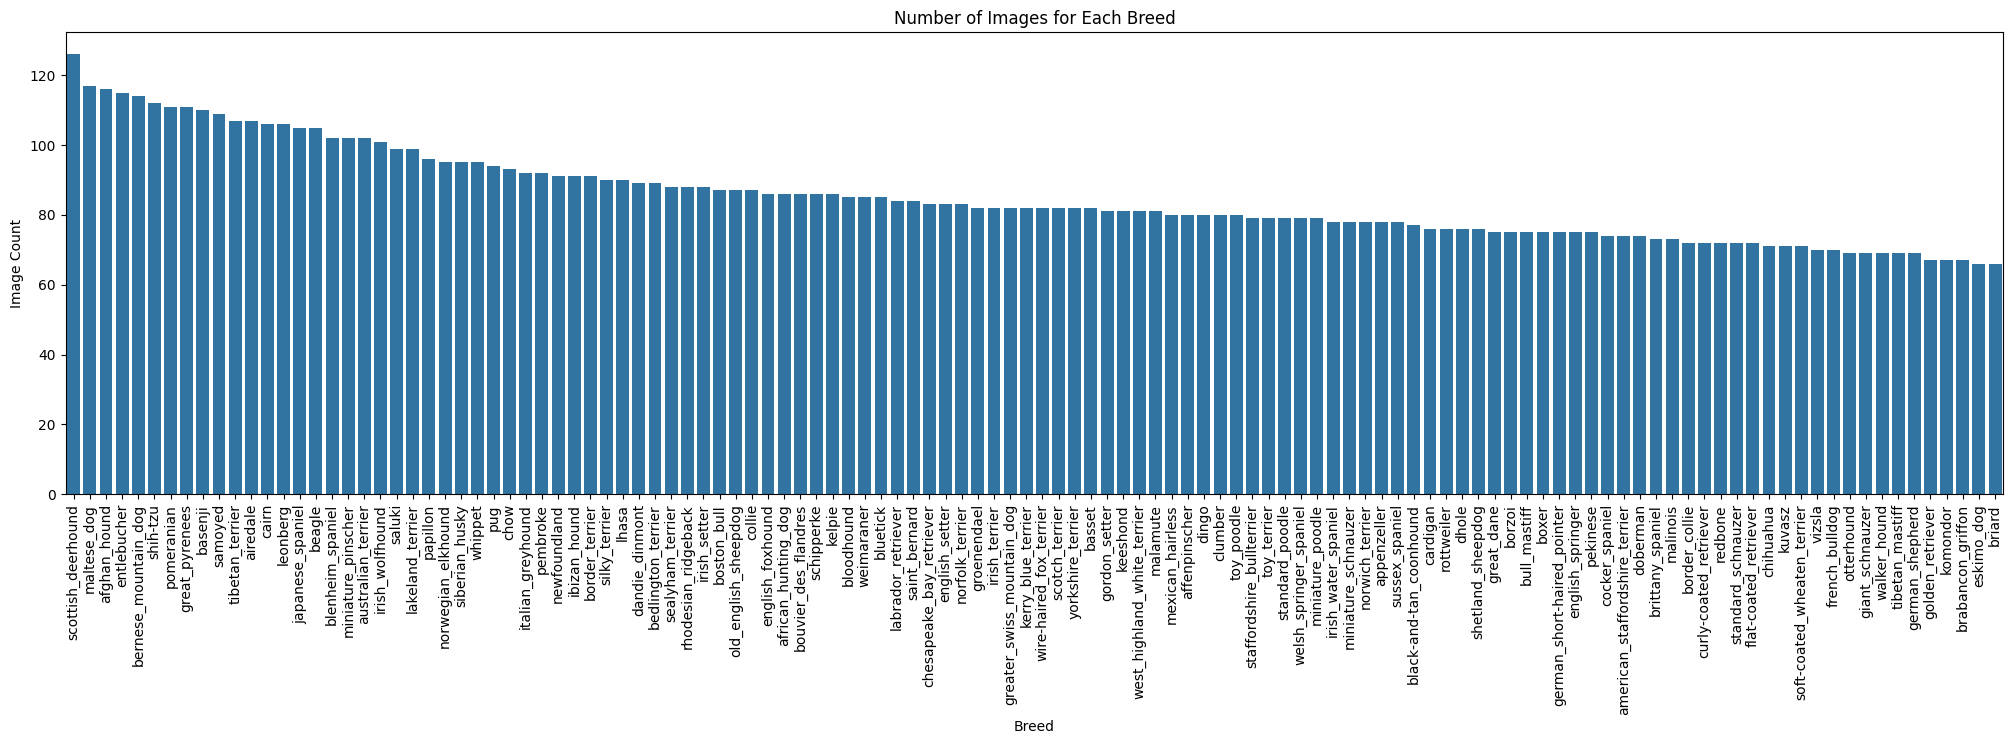

In [ ]:
#finding number images for each dog breed class

plt.figure(figsize = (25,6))
count =sns.countplot(x=dogBreedTrainLabels['breed'],order=dogBreedTrainLabels['breed'].value_counts().index)
plt.title("Number of Images for Each Breed")
plt.ylabel("Image Count")
plt.xlabel("Breed")
plt.xticks(rotation=90)
plt.show()

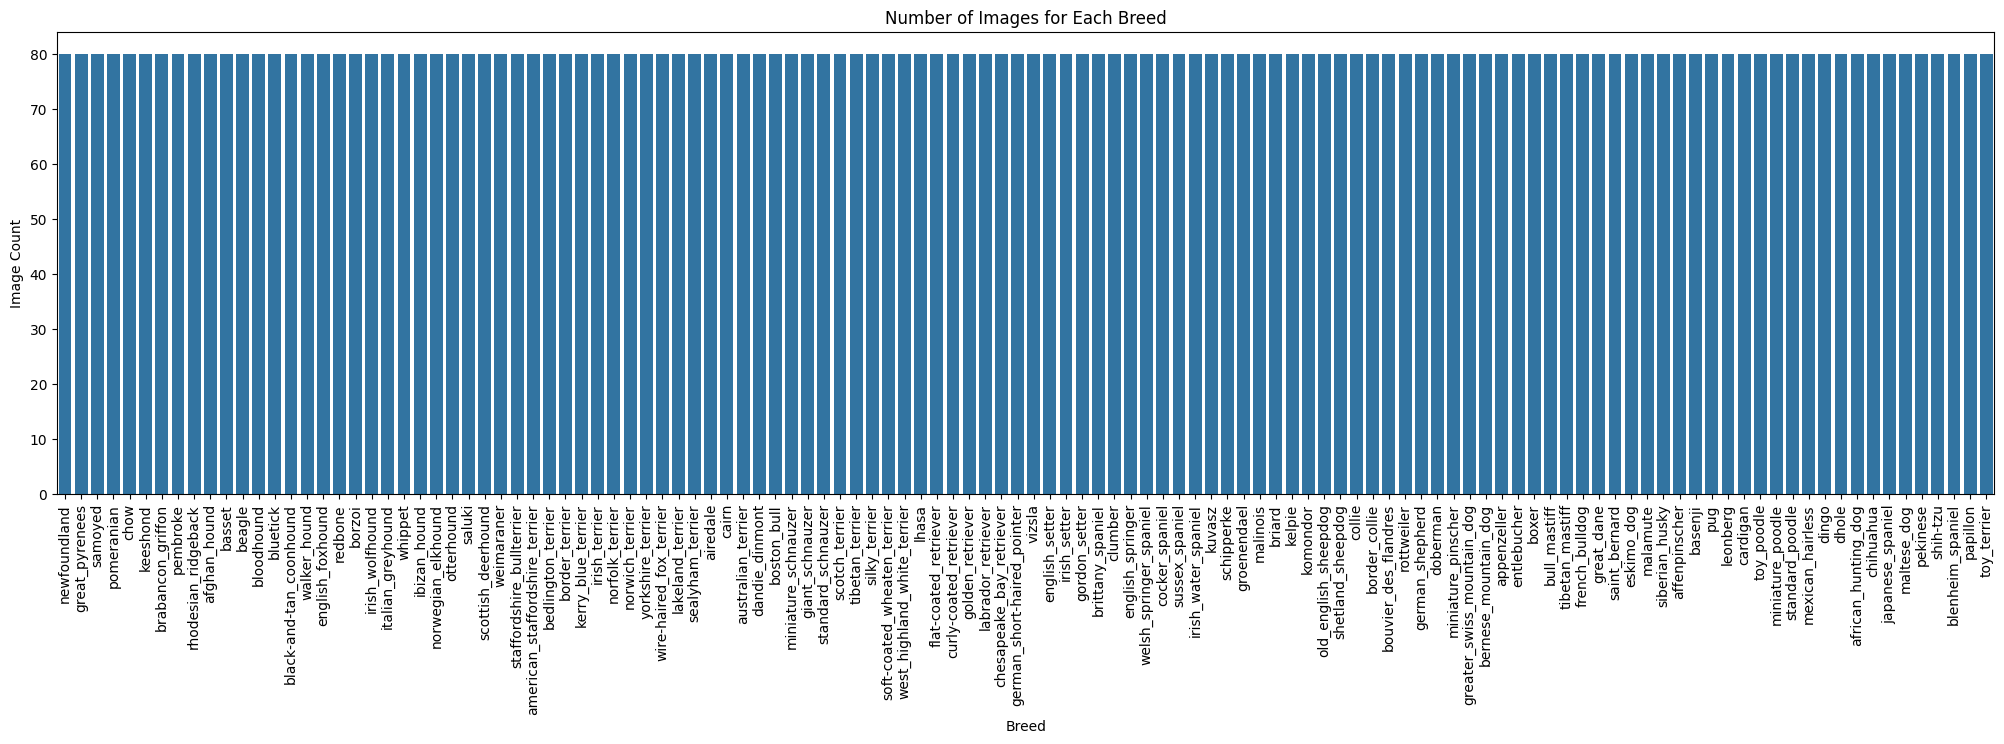

In [ ]:
#finding number test images for each dog breed class

plt.figure(figsize = (25,6))
count =sns.countplot(x=dogBreedTestLabels['breed'],order=dogBreedTestLabels['breed'].value_counts().index)
plt.title("Number of Images for Each Breed")
plt.ylabel("Image Count")
plt.xlabel("Breed")
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing


1.   Labels preprocessing
2.   Image Preprocessing



In [ ]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(dogBreedTrainLabels['breed'])))
# n_classes = len(classes)
print('Total number of breeds:' , len(classes))


# Encoding train classes with a number
encodedTrainClasses = dict(zip(classes, range(len(classes))))
encodedTrainClasses

Total number of breeds: 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [ ]:
#Create list of alphabetically sorted labels.
classesTest = sorted(list(set(dogBreedTestLabels['breed'])))
# n_classes = len(classes)
print('Total number of breeds:' , len(classesTest))


# Encoding test classes with a number
encodedTestClasses = dict(zip(classesTest, range(len(classesTest))))
encodedTestClasses

Total number of breeds: 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

## Creating Train Data

*   train_X : Conatains images to train the model
*   train_Y : Contains breed labels for each image in the train_X. Will feed in model taining




In [ ]:
import time
t = time.time()

inputShape = (331,331,3)
trainDir = '/content/dog-breed-classification/DATASET/train_images';
labels = dogBreedTrainLabels[:]

imageLabels = labels['breed']
train_X = np.zeros([len(labels), inputShape[0], inputShape[1], inputShape[2]],dtype=np.uint8)
train_Y = np.zeros([len(labels),1],dtype = np.uint8)

for ix, image_name in enumerate(tqdm(labels['id'].values)):
  imageDir = os.path.join(trainDir, image_name + '.jpg')
  breedImage = load_img(imageDir, target_size = inputShape)
  train_X[ix]= breedImage
  del breedImage

  dogBreed = imageLabels[ix]
  train_Y[ix] = encodedTrainClasses[dogBreed]

train_Y = to_categorical(train_Y)

print('runtime in seconds: {}'.format(time.time() - t))

  0%|          | 0/10222 [00:00<?, ?it/s]

runtime in seconds: 20.7393639087677


Plotting sample images of Train Data

In [ ]:
plt.figure(figsize=(20,20))

for i in range(25):
  ax = plt.subplot(5,5, i+1)
  plt.title(classes[np.where(train_Y[i] ==1)[0][0]])
  plt.imshow(train_X[i].astype('int32'))

#Model Building

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
baseModel = InceptionV3(weights='imagenet', include_top=False, input_shape=inputShape)

# Freeze the weights of the InceptionV3 base model
for layer in baseModel.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
baseModel.layers

In [ ]:
print("Number of Layers from InceptionV3: " , len(baseModel.layers))

Number of Layers from InceptionV3:  311


In [ ]:
model = Sequential()
model.add(Input(inputShape))
model.add(Lambda(preprocess_input))
model.add(baseModel)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.8))
model.add(Dense(len(classes),activation= 'softmax'))

model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

#Training the model.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 331, 331, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 9, 9, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
Total params: 22048664 (84.11 MB)
Trainable params: 245880 (960.47 KB)
Non-trainable params: 21802784 (83.17 MB)
_________

# Model Training

Declaring main values for training the model

In [ ]:
batch_size= 128
epochs=30
learn_rate=.001
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Training the model

In [ ]:
modelHistory = model.fit(train_X, train_Y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr, EarlyStop])

Epoch 1/30
64/64 [==============================] - ETA: 0s - loss: 3.4550 - accuracy: 0.3110

64/64 [==============================] - 115s 1s/step - loss: 3.4550 - accuracy: 0.3110 - val_loss: 1.5322 - val_accuracy: 0.8494 - lr: 0.0010
Epoch 2/30
64/64 [==============================] - ETA: 0s - loss: 1.2476 - accuracy: 0.7580

64/64 [==============================] - 44s 695ms/step - loss: 1.2476 - accuracy: 0.7580 - val_loss: 0.6266 - val_accuracy: 0.8958 - lr: 0.0010
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.8430

64/64 [==============================] - 45s 708ms/step - loss: 0.7155 - accuracy: 0.8430 - val_loss: 0.4311 - val_accuracy: 0.9032 - lr: 0.0010
Epoch 4/30
64/64 [==============================] - ETA: 0s - loss: 0.5507 - accuracy: 0.8639

64/64 [==============================] - 45s 701ms/step - loss: 0.5507 - accuracy: 0.8639 - val_loss: 0.3585 - val_accuracy: 0.9149 - lr: 0.0010
Epoch 5/30
64/64 [==============================] - ETA: 0s - loss: 0.4540 - accuracy: 0.8819

64/64 [==============================] - 45s 702ms/step - loss: 0.4540 - accuracy: 0.8819 - val_loss: 0.3220 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 6/30
64/64 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8902

64/64 [==============================] - 43s 674ms/step - loss: 0.4069 - accuracy: 0.8902 - val_loss: 0.3028 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 7/30
64/64 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.8905

64/64 [==============================] - 43s 675ms/step - loss: 0.3819 - accuracy: 0.8905 - val_loss: 0.2875 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 8/30
64/64 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8987

64/64 [==============================] - 45s 702ms/step - loss: 0.3521 - accuracy: 0.8987 - val_loss: 0.2802 - val_accuracy: 0.9139 - lr: 0.0010
Epoch 9/30
64/64 [==============================] - ETA: 0s - loss: 0.3243 - accuracy: 0.9033

64/64 [==============================] - 45s 700ms/step - loss: 0.3243 - accuracy: 0.9033 - val_loss: 0.2677 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 10/30
64/64 [==============================] - ETA: 0s - loss: 0.3065 - accuracy: 0.9110

64/64 [==============================] - 43s 673ms/step - loss: 0.3065 - accuracy: 0.9110 - val_loss: 0.2661 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 11/30
64/64 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.9132

64/64 [==============================] - 45s 703ms/step - loss: 0.2921 - accuracy: 0.9132 - val_loss: 0.2607 - val_accuracy: 0.9174 - lr: 0.0010
Epoch 12/30
64/64 [==============================] - ETA: 0s - loss: 0.2864 - accuracy: 0.9124

64/64 [==============================] - 43s 671ms/step - loss: 0.2864 - accuracy: 0.9124 - val_loss: 0.2609 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 13/30
64/64 [==============================] - ETA: 0s - loss: 0.2690 - accuracy: 0.9187

64/64 [==============================] - 45s 701ms/step - loss: 0.2690 - accuracy: 0.9187 - val_loss: 0.2558 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 14/30
64/64 [==============================] - ETA: 0s - loss: 0.2581 - accuracy: 0.9178

64/64 [==============================] - 45s 701ms/step - loss: 0.2581 - accuracy: 0.9178 - val_loss: 0.2565 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 15/30
64/64 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9217

64/64 [==============================] - 43s 672ms/step - loss: 0.2540 - accuracy: 0.9217 - val_loss: 0.2545 - val_accuracy: 0.9159 - lr: 0.0010
Epoch 16/30
64/64 [==============================] - ETA: 0s - loss: 0.2383 - accuracy: 0.9241

64/64 [==============================] - 45s 703ms/step - loss: 0.2383 - accuracy: 0.9241 - val_loss: 0.2538 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 17/30
64/64 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.9264

64/64 [==============================] - 43s 672ms/step - loss: 0.2333 - accuracy: 0.9264 - val_loss: 0.2583 - val_accuracy: 0.9144 - lr: 0.0010
Epoch 18/30
64/64 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9305

64/64 [==============================] - 45s 700ms/step - loss: 0.2244 - accuracy: 0.9305 - val_loss: 0.2540 - val_accuracy: 0.9139 - lr: 0.0010
Epoch 19/30
64/64 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9252

64/64 [==============================] - 45s 702ms/step - loss: 0.2230 - accuracy: 0.9252 - val_loss: 0.2511 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 20/30
64/64 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9320

64/64 [==============================] - 43s 672ms/step - loss: 0.2186 - accuracy: 0.9320 - val_loss: 0.2538 - val_accuracy: 0.9105 - lr: 0.0010
Epoch 21/30
64/64 [==============================] - ETA: 0s - loss: 0.2144 - accuracy: 0.9322

64/64 [==============================] - 43s 670ms/step - loss: 0.2144 - accuracy: 0.9322 - val_loss: 0.2543 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 22/30
64/64 [==============================] - ETA: 0s - loss: 0.2019 - accuracy: 0.9380

64/64 [==============================] - 45s 699ms/step - loss: 0.2019 - accuracy: 0.9380 - val_loss: 0.2527 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 23/30
64/64 [==============================] - ETA: 0s - loss: 0.1982 - accuracy: 0.9348

64/64 [==============================] - 45s 700ms/step - loss: 0.1982 - accuracy: 0.9348 - val_loss: 0.2495 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 24/30
64/64 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9362

64/64 [==============================] - 43s 675ms/step - loss: 0.1969 - accuracy: 0.9362 - val_loss: 0.2474 - val_accuracy: 0.9144 - lr: 0.0010
Epoch 25/30
64/64 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.9351

64/64 [==============================] - 43s 670ms/step - loss: 0.1953 - accuracy: 0.9351 - val_loss: 0.2542 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 26/30
64/64 [==============================] - ETA: 0s - loss: 0.1924 - accuracy: 0.9373

64/64 [==============================] - 43s 671ms/step - loss: 0.1924 - accuracy: 0.9373 - val_loss: 0.2516 - val_accuracy: 0.9090 - lr: 0.0010
Epoch 27/30
64/64 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9362

64/64 [==============================] - 43s 667ms/step - loss: 0.1894 - accuracy: 0.9362 - val_loss: 0.2534 - val_accuracy: 0.9095 - lr: 0.0010
Epoch 28/30
64/64 [==============================] - ETA: 0s - loss: 0.1840 - accuracy: 0.9386

64/64 [==============================] - 43s 669ms/step - loss: 0.1840 - accuracy: 0.9386 - val_loss: 0.2541 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 29/30
64/64 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9420

64/64 [==============================] - 44s 696ms/step - loss: 0.1794 - accuracy: 0.9420 - val_loss: 0.2550 - val_accuracy: 0.9095 - lr: 0.0010
Epoch 30/30
64/64 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.9407

64/64 [==============================] - 44s 695ms/step - loss: 0.1805 - accuracy: 0.9407 - val_loss: 0.2526 - val_accuracy: 0.9134 - lr: 0.0010


In [ ]:
del train_X
gc.collect()

10502

**Plotting Training Graphs**

Text(0.5, 0, 'epoch')

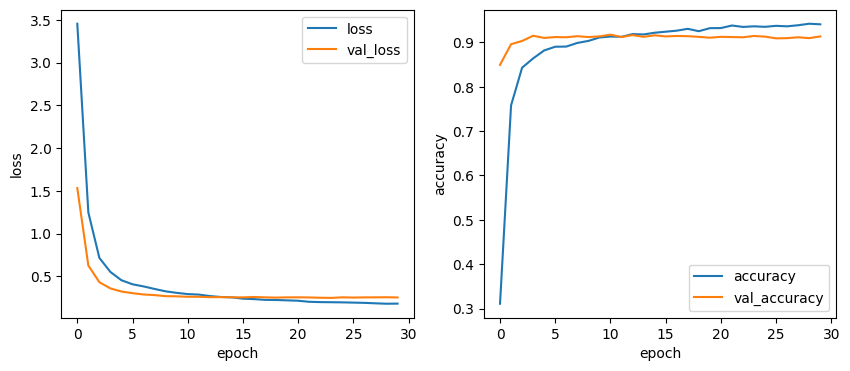

In [ ]:
# Plotting Loss Graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

# Plotting Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

# Model Testing

Create Test Data


1.   test_X: Testing Images
2.   test_Y: Coressponding Labels for test images



In [ ]:
t = time.time()

input_shape = (331,331,3)
test_dir = '/content/dog-breed-classification/DATASET/test_images';
labels = dogBreedTestLabels[:]

image_labels = labels['breed']
test_X = np.zeros([len(labels), input_shape[0], input_shape[1], input_shape[2]],dtype=np.uint8)
test_Y = np.zeros([len(labels),1],dtype = np.uint8)

for ix, image_name in enumerate(tqdm(labels['id'].values)):
  try:

    image_dir = os.path.join(test_dir, image_name + '.jpg')

    breed_image = load_img(image_dir, target_size = input_shape)
    test_X[ix]= breed_image
    del breed_image

    dog_breed = image_labels[ix]
    test_Y[ix] = encodedTestClasses[dog_breed]
  except:
    continue


test_Y = to_categorical(test_Y)

print('runtime in seconds: {}'.format(time.time() - t))

  0%|          | 0/9600 [00:00<?, ?it/s]

runtime in seconds: 20.600528717041016


Plotting Sample Images of Test Data

In [ ]:

plt.figure(figsize=(20,20))

for i in range(25):
  ax = plt.subplot(5,5, i+1)
  plt.title(classesTest[np.where(test_Y[i] ==1)[0][0]])
  plt.imshow(test_X[i].astype('int32'))

**Predicting the test images**

In [ ]:
pred = model.predict(test_X)
print(pred)

300/300 [==============================] - 46s 132ms/step
[[3.3567474e-07 2.2257968e-06 2.1602521e-06 ... 6.8728655e-06
  1.1338866e-07 3.0449639e-05]
 [4.2146771e-06 1.1459493e-06 2.7768353e-06 ... 1.0018931e-06
  1.4080069e-07 1.1821798e-05]
 [2.7118517e-07 3.9453147e-07 3.6756235e-06 ... 2.9641322e-03
  2.6110334e-07 3.1570224e-05]
 ...
 [5.7484482e-07 4.7364588e-06 9.9819797e-01 ... 2.0500145e-05
  8.0932938e-07 6.0980178e-06]
 [5.2161897e-07 4.3802766e-06 9.9896026e-01 ... 6.4658525e-05
  1.5646584e-07 2.4221256e-06]
 [9.2295079e-07 2.1160490e-06 9.9676752e-01 ... 2.6977179e-05
  5.0187811e-07 2.0992613e-06]]


In [ ]:
# First prediction
print(pred[0])
print(f"Highest Probability: {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[3.35674741e-07 2.22579683e-06 2.16025205e-06 1.98688113e-07
 1.05871072e-06 1.78211712e-06 2.37440943e-07 1.72714717e-04
 1.90388207e-07 4.26204388e-05 1.78011177e-07 2.58421835e-08
 1.26614214e-06 4.01351235e-06 1.59351123e-06 3.38742893e-06
 6.50752952e-07 8.95028563e-07 8.38686844e-08 1.31317947e-05
 2.62110939e-06 1.12174405e-06 2.11197357e-06 4.18370405e-07
 1.15242676e-06 5.77042329e-07 2.75693878e-07 1.33236972e-04
 1.12066353e-07 9.96158838e-01 1.22906030e-07 3.07643205e-07
 1.01574324e-06 8.86532234e-06 2.81257861e-08 1.84314695e-06
 5.57457042e-06 2.95651000e-04 6.07371931e-07 5.20574019e-07
 9.74945124e-07 6.25603107e-08 2.10173724e-07 5.41615555e-05
 2.64927479e-07 1.08642162e-05 1.14727982e-05 2.22569369e-07
 3.90326505e-07 2.61959485e-06 1.74691721e-07 1.03637569e-06
 4.27037179e-07 1.16380704e-06 2.42571531e-07 2.34729203e-04
 1.83213069e-06 2.72415946e-07 8.26426358e-08 1.52118218e-07
 8.43399175e-06 4.07598378e-07 1.55426905e-09 6.31138158e-04
 1.21990055e-07 1.762096

In [ ]:
del test_X
gc.collect()

76462

# Model Evaluation

This section evaluates the performance of the model. Accuracy, precision, recall and F1 score will be utilized to determine the performance of the model.

In [ ]:
from sklearn.metrics import classification_report


y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_Y, axis=1)
report = classification_report(y_true, y_pred, target_names=classes)

print("Classification Report:")
print(report)


Classification Report:
                                precision    recall  f1-score   support

                 affenpinscher       0.97      0.95      0.96        80
                  afghan_hound       0.96      0.99      0.98        80
           african_hunting_dog       0.99      1.00      0.99        80
                      airedale       0.96      0.97      0.97        80
american_staffordshire_terrier       0.89      0.69      0.77        80
                   appenzeller       0.88      0.79      0.83        80
            australian_terrier       0.96      0.95      0.96        80
                       basenji       0.97      0.96      0.97        80
                        basset       0.99      0.99      0.99        80
                        beagle       0.88      0.95      0.92        80
            bedlington_terrier       1.00      0.99      0.99        80
          bernese_mountain_dog       0.89      0.96      0.92        80
       black-and-tan_coonhound       0.9

# Predicting Breed of a Custom Input

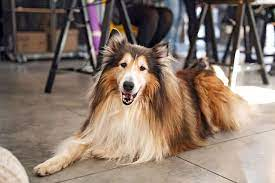

In [ ]:
from IPython.display import display, Image
Image('/content/col.jpeg')

In [ ]:
customInput = load_img('/content/col.jpeg',target_size = input_shape)
customInput = np.expand_dims(customInput, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format


In [ ]:
predg = model.predict(customInput)

print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100}%")

1/1 [==============================] - 0s 46ms/step
Predicted label: collie
Probability of prediction): 100%


# Exporting the Model

In [ ]:
# Downloading the model to deploy in a python environment
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 26.3 MB/s eta 0:00:00


In [ ]:
# downloading the model to deploy in a javascript environment(React)
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/Model')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!zip -r /content/Model.zip /content/Model

  adding: content/Model/ (stored 0%)
  adding: content/Model/group1-shard14of22.bin (deflated 7%)
  adding: content/Model/group1-shard10of22.bin (deflated 7%)
  adding: content/Model/group1-shard15of22.bin (deflated 7%)
  adding: content/Model/group1-shard2of22.bin (deflated 7%)
  adding: content/Model/group1-shard7of22.bin (deflated 7%)
  adding: content/Model/group1-shard13of22.bin (deflated 7%)
  adding: content/Model/group1-shard21of22.bin (deflated 7%)
  adding: content/Model/group1-shard1of22.bin (deflated 7%)
  adding: content/Model/group1-shard4of22.bin (deflated 7%)
  adding: content/Model/group1-shard22of22.bin (deflated 7%)
  adding: content/Model/model.json (deflated 96%)
  adding: content/Model/group1-shard18of22.bin (deflated 7%)
  adding: content/Model/group1-shard19of22.bin (deflated 7%)
  adding: content/Model/group1-shard16of22.bin (deflated 7%)
  adding: content/Model/group1-shard5of22.bin (deflated 7%)
  adding: content/Model/group1-shard17of22.bin (deflated 7%)
  a